## Start

In [45]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
from plot_helpers import *
import numpy as np
import os
import math
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', 1000)

############## FIGURES ##############
# Generic plotting configurations
# plt.rcParams['figure.figsize'] = [10, 6]
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42

plt.style.use('ggplot')
# plt.style.use(['science', 'ieee'])
plt.rcParams['figure.dpi'] = 130
# plt.rcParams['figure.figsize'] = [2.12, 1.6]

def xm(x):
    return np.array([x,   1])
def ym(y):
    return np.array([1,   y])

default  = np.array([3.3,   2.5])
double   = np.array([6.6,   5])
tlwidth  = np.array([1.58, 2.5])
hlwidth  = np.array([2.375, 2.5])
flwidth  = np.array([4.75,  2.5])
fl22  = np.array([4.75,  2])
flhh  = np.array([4.75,  1.25])

figfolder = 'plots'

############### Experiment selection ###################

EXP_list     = [exp_folder.split('experiment_')[-1][:-1] for exp_folder in sorted(glob.glob('%s/*/' % datadir))]
CFG_dict = {exp: [cfg_folder.split('/')[-2] for cfg_folder in sorted(glob.glob('%s/%s/*/' % (datadir,'experiment_'+exp)))] for exp in EXP_list}
REP_dict = {exp+'/'+cfg: [rep_folder.split('/')[-2] for rep_folder in sorted(glob.glob('%s/%s/%s/*/' % (datadir,'experiment_'+exp, cfg)))] for exp in EXP_list for cfg in CFG_dict[exp]} 

EXP_drop = widgets.Dropdown(
    options=EXP_list,
    value=EXP_list[-1],
    description='Exp:',
    disabled=False,
)

EXP_multiple = widgets.SelectMultiple(
    options=EXP_list,
    value=[EXP_list[-1]],
    description='Exp:',
    disabled=False,
)

CFG_drop    = widgets.Dropdown(description='Cfg:',options=['all'], value = 'all', disabled=False)
REP_drop    = widgets.Dropdown(description='Rep:',options=['all'], value = 'all', disabled=False)
LOAD_button = widgets.Button(description='Load Exp')
CONF_button = widgets.Button(description='See Config')

global df_exp
global logfile
global loaded
loaded = ('','')

def on_load_button_clicked(b):
    global df_exp, logfile, loaded
    
    df_exp = create_df(EXP_drop.value, logfile)
    loaded = (EXP_drop.value, logfile)
    print('Loaded experiment: %s | datafile: %s' % loaded)

def on_conf_button_clicked(b):
    global df_exp, logfile, loaded
    
    get_config_dicts(EXP_drop.value, CFG_drop.value, REP_drop.value)
    
def on_change_exp(change):

    if change['name'] == 'value':
        CFG_drop.options = ['all']+CFG_dict[EXP_drop.value]
        if CFG_drop.value == 'all':
            REP_drop.options = ['all']
        else:
            REP_drop.options = ['all']+REP_dict[EXP_drop.value+'/'+CFG_drop.value]
        
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        CFG_drop.options = ['all']+CFG_dict[EXP_drop.value]
        if CFG_drop.value == 'all':
            REP_drop.options = ['all']
        else:
            REP_drop.options = ['all']+REP_dict[EXP_drop.value+'/'+CFG_drop.value]
              
EXP_drop.observe(on_change)
CFG_drop.observe(on_change)
LOAD_button.on_click(on_load_button_clicked)
CONF_button.on_click(on_conf_button_clicked)

def load_df(lf = None, select = True):
    global df_exp, logfile, loaded
    
    logfile = lf
    
    # Select which experiment to plot the whole blockchain
    if select:
        grid = widgets.GridspecLayout(3,2)
        grid[0,0] = EXP_drop
        grid[1,0] = CFG_drop
        grid[2,0] = REP_drop
        grid[1,1] = LOAD_button
        grid[2,1] = CONF_button
        display(grid)
        
    if loaded != (EXP_drop.value, logfile):
        LOAD_button.click()
        on_change({'type':'change', 'name':'value'})
    df = df_exp
    
    if CFG_drop.value != 'all':
        df = df.query("CFG in @CFG_drop.value")

    if REP_drop.value != 'all':
        df = df.query("REP in @REP_drop.value")
    return df
    
def load_mult_df(lf, select = True):
    global df_exp, logfile, loaded

    logfile = lf
    
    # Select which experiment to plot the whole blockchain
    if select:
        grid = widgets.GridspecLayout(1,2)
        grid[0,0] = EXP_mult
        grid[0,1] = CONF_button
        display(grid)
        
    df = pd.DataFrame()
    for EXP in EXP_mult.value:
        df_exp = create_df(EXP, logfile)      
        df = pd.concat([df, df_exp], ignore_index=True)
            
    loaded = (EXP_mult.value, logfile)
    print('Loaded || dataframe: %s datafile: %s' % loaded)
    return df

## Automatically default the dataset to most recently changed
all_subdirs = ['data/'+d for d in os.listdir('data/') if d.startswith('experiment')]
latest_subdir = max(all_subdirs, key=os.path.getmtime)
EXP_drop.value = latest_subdir.split('experiment_')[-1]

print("Experiments: ",EXP_list)
print("Configurats: ",CFG_dict)
print("Repetitions: ",REP_dict)

load_df()

Experiments:  ['test']
Configurats:  {'test': ['1']}
Repetitions:  {'test/1': ['001', '002', '003', '004']}


GridspecLayout(children=(Dropdown(description='Exp:', layout=Layout(grid_area='widget001'), options=('test',),…

Loaded experiment: test | datafile: None


In [48]:
# ## LOAD ALL DFs
df_firm    = load_df('firm', False)
df_sc      = load_df('sc', False)
df_block   = load_df('block', False)
df_loop    = load_df('loop', False)
df_sim     = load_df('simulation', False)
df_col     = load_df('collection', False)

Loaded experiment: test | datafile: firm
Loaded experiment: test | datafile: sc
Loaded experiment: test | datafile: block
Loaded experiment: test | datafile: loop
Loaded experiment: test | datafile: simulation
Loaded experiment: test | datafile: collection


In [ ]:
## VISUALIZE DFs
# display(df_block)
# display(df_sc)
# display(df_firm)

ID          TIME  TELAPSED  TIMESTAMP  BLOCK   
16770   1  1.744716e+09         0          0      0  \
16771   1  1.744716e+09      -100        100      1   
16772   1  1.744716e+09        11        200      2   
16773   1  1.744716e+09        16        300      3   
16774   1  1.744716e+09        21        400      4   
...    ..           ...       ...        ...    ...   
22690   9  1.744716e+09        22      49350    390   
22691   9  1.744716e+09        23      49475    391   
22692   9  1.744716e+09        20      49625    392   
22693   9  1.744716e+09        17      49775    393   
22694   9  1.744716e+09        35      49925    394   

                                                    HASH   
16770  8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...  \
16771  c14c59a83ce60669d9e6e5be619e458a0368382906b338...   
16772  99ee5458850846a32668ff4d958bec44f83daeac6c2f4f...   
16773  4a15cac5f4334cca99684227fbf60be28e07c05bbbb064...   
16774  9455da87e3e1d5cbb4431623d1e963bb35c3258a5c0a02...   
...                                                  ...   
22690  a226a354ccbbf84d4b75692195e42e38b344f384c02a12...   
22691  cb9283c1fab31e8ea1be2a0d823fa785cb7e12ec371a63...   
22692  2637347ab229fbda824256c0b1dfc81800ea6ef0b61202...   
22693  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de...   
22694  9dc92b38537b4a499927d8de60103091349ecbae7698b0...   

                                                   PHASH  DIFF  TDIFF   
16770                                                  0     0      0  \
16771  8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...     2      2   
16772  c14c59a83ce60669d9e6e5be619e458a0368382906b338...     2      4   
16773  99ee5458850846a32668ff4d958bec44f83daeac6c2f4f...     2      6   
16774  4a15cac5f4334cca99684227fbf60be28e07c05bbbb064...     2      8   
...                                                  ...   ...    ...   
22690  b548f0954f50547249c6be0b487929b06f6465be31b938...     1    487   
22691  a226a354ccbbf84d4b75692195e42e38b344f384c02a12...     1    488   
22692  cb9283c1fab31e8ea1be2a0d823fa785cb7e12ec371a63...     1    489   
22693  2637347ab229fbda824256c0b1dfc81800ea6ef0b61202...     1    490   
22694  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de...     1    491   

           SIZE  SIZEDATA  SIZESTATE  TXS   EXP CFG  REP CONTROLLER  BALANCE  
16770  0.046875  0.054688   0.046875    0  test   1  004          1      0.0  
16771  0.046875  0.054688   0.046875    0  test   1  004          1      0.0  
16772  0.046875  0.054688   0.046875    0  test   1  004          1      0.0  
16773  0.046875  0.054688   0.046875    0  test   1  004          1      0.0  
16774  0.046875  0.054688   0.046875    0  test   1  004          1      0.0  
...         ...       ...        ...  ...   ...  ..  ...        ...      ...  
22690  0.046875  0.054688   0.046875    0  test   1  004          1   3447.0  
22691  0.046875  0.085938   0.046875    3  test   1  004          1   3447.0  
22692  0.046875  0.085938   0.046875    1  test   1  004          1   3447.0  
22693  0.046875  0.085938   0.046875    2  test   1  004          1   3402.0  
22694  0.046875  0.085938   0.046875    2  test   1  004          1   3402.0  

[5925 rows x 18 columns]

## Time elapsed between block production to reception

In [50]:
# Generate the dataframe
df = df_block
df = df.get_param(df,'generic','block_period')

# Process the data  
bins = range(0, 140, 10)
XX = df.groupby('HASH')['TELAPSED'].agg('max').div(10)

# Create plot
ax = plt.axes()
hist, bins = np.histogram(XX, bins=bins)
ax.bar(bins[:-1]+(bins[1]-bins[0])/2, hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='green', edgecolor='gray')
# ax = df['TELAPSED'].plot.hist(color='green', bins=bins, xticks=xticks)

# Edit plot
ax.grid(axis='x', linestyle='--', color='k', alpha=0.2) 
ax.set_title('Time elapsed between block \n production and reception (%s blocks)' % len(XX))

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.set_ylim(ymin=0, ymax = 1)
# ax.set_ylabel('Percentage of blocks received within')

ax.set_xticks(bins)
ax.set_xlim(xmin=bins[0], xmax = bins[-1])
ax.set_xlabel('Block Travel Time  [s]')

# Save plot
# plt.savefig("plots/experiment_"+EXP+"/time_elapsed_recept.png", bbox_inches='tight', dpi=600)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'get_param'

## Time elapsed between consecutive blocks

In [51]:
# # Generate the dataframe
df = df_block

# Process the dataframe  
df = df.get_param(df,'generic','block_period')
bins = range(0, 100, 10)

mainchains = get_mainchains(df)
df = df[df['HASH'].isin(mainchains)]
df = df.drop_duplicates('HASH')
df['TPROD'] = df.groupby(['EXP', 'REP'])['TIMESTAMP'].diff(1).div(10)

# Create plot
ax = plt.axes()
hist, bins = np.histogram(df['TPROD'], bins=bins)
ax.bar(bins[:-1]+(bins[1]-bins[0])/2, hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='green', edgecolor='gray')
# ax = df['TPROD'].plot.hist(color='green', bins=bins, xticks=xticks)

# Edit plot
ax.set_title('Time elapsed between consecutive blocks \n (%s mainchain blocks)' % len(df))
ax.grid(axis='x', linestyle='--', color='k', alpha=0.2) 

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.set_ylim(ymin=0, ymax = 1)
# ax.set_ylabel('Percentage of blocks produced within')

ax.set_xticks(bins)
ax.set_xlim(xmin=bins[0], xmax = bins[-1])
ax.set_xlabel('Block Production Time  [s]')

# Save plot
# plt.savefig("plots/experiment_"+EXP+"/time_elapsed_prod.png", dpi=600)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'get_param'

## Check how many blocks were produced

In [52]:
df = df_block

# Process the dataframe  
mainchains = get_mainchains(df)
df = df[df['HASH'].isin(mainchains)]
df = df.drop_duplicates('HASH')

display(df.groupby(['EXP', 'CFG', 'REP'], as_index=False).agg({'BLOCK':'max'}))

EXP CFG  REP  BLOCK
0  test   1  004    394

## Reward V Time (plot)

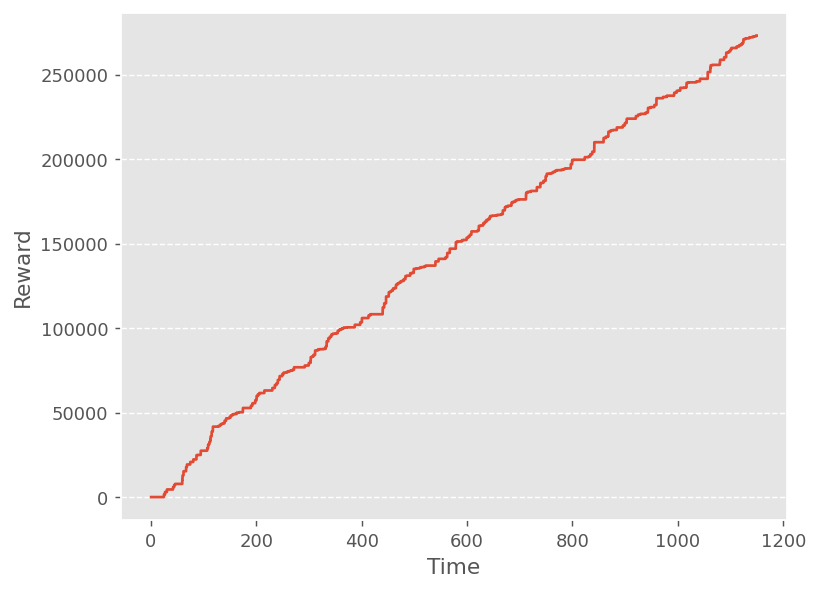

In [53]:
# Generate the dataframe
df = df_loop

# Plot options
XX = 'TIME'
YY = 'VALUE'
BP = 'Robots'
yl = 'Reward'
xl = 'Time'
fs = xm(2)*flwidth

# Process the data 
df = df.set_index(XX).groupby(EXP_CFG_REP)

# Create plot
ax = plt.axes()
df[YY].plot(ax=ax)

# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
# ax.set_ylim(ymin=0, ymax = df[YY].max()*1.1)
    
plt.gcf().tight_layout()
# ax.legend()
# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

## Revenue (boxplot)

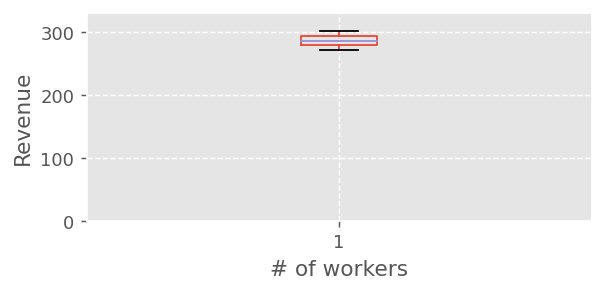

In [25]:
# Generate the dataframe
df = df_loop
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
# df = get_param_df(df, 'experiment', 'MAXWORKERS', alias = 'limit')
# df = get_param_df(df, 'experiment', 'EPSILON', alias = 'epsilon')

# Plot options
XX = 'CFG'
YY = 'VALUE'
BP = 'EXP'
yl = 'Revenue'
xl = '# of workers'
fs = flwidth

# Process the data 
df[YY] = df[YY].div(1000)
df = df.groupby([]+EXP_CFG_REP, as_index=False).agg({YY:'max'})

# Create plot
bp = df.groupby(BP).boxplot(column=[YY], by = XX, sharex=True, figsize=fs, layout=(1,1))

# Edit plot 
plt.suptitle('')
# for axi in bp:axi.xaxis.set_minor_locator(ticker.NullLocator())
for axi in bp: axi.xaxis.grid(True, linestyle = '--')
for axi in bp: axi.yaxis.grid(True, linestyle = '--')
for axi in bp: axi.set_xlabel(xl)
for axi in bp: axi.set_ylabel(yl)
for axi in bp: axi.set_title('') 
for axi in bp: axi.set_ylim(ymin=0, ymax = df[YY].max()*1.1)
    
plt.gcf().tight_layout()
# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

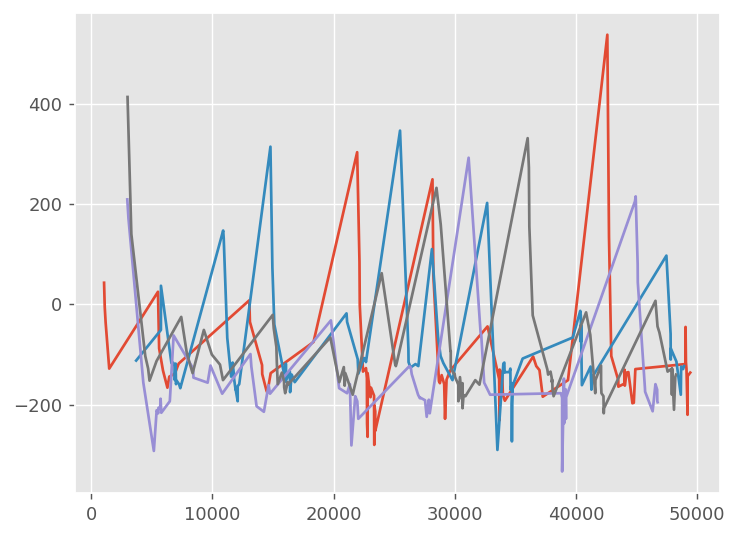

In [72]:
# Generate the dataframe
df = df_firm
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')

# Plot options
XX = 'CFG'
YY = 'PROFIT'
BP = 'EXP'
yl = 'Profit'
xl = '# of workers'
fs = flwidth

# Process the data 
# df = df.groupby([]+EXP_CFG_REP, as_index=False).agg({YY:'mean'})
grouped = df.groupby('PATCH', as_index=False)
display(grouped)

# Create plot
for patch_id, group in grouped:
    group = group.sort_values('TSTART')
    # We'll assume QLTY is consistent within each group
    color = group['QLTY'].iloc[0]
    plt.plot(group['TSTART'], group['PROFIT'], label=f'PATCH {patch_id}')


# # Edit plot 
# plt.suptitle('')
# # for axi in bp:axi.xaxis.set_minor_locator(ticker.NullLocator())
# for axi in bp: axi.xaxis.grid(True, linestyle = '--')
# for axi in bp: axi.yaxis.grid(True, linestyle = '--')
# for axi in bp: axi.set_xlabel(xl)
# for axi in bp: axi.set_ylabel(yl)
# for axi in bp: axi.set_title('') 
# # for axi in bp: axi.set_ylim(ymin=0, ymax = df[YY].max()*1.1)
    
# plt.gcf().tight_layout()
# # plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
# plt.show()

## Smart Contract (plot)

In [ ]:
# Generate the dataframe
df = df_sc
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')


# Plot options
XX = 'BLOCK'
YY = 'PROFIT'
yl = 'Profit'
xl = 'Block'
fs = double

# Process the data
df["XY"] = df["X"].astype(str)+df["Y"].astype(str)
df = df.drop_duplicates(['HASH','XY']).reset_index()

main_leaf = df.iloc[-1]['HASH']
main_df = get_mainchain_df(df, main_leaf).reset_index()
df = df[df['HASH'].isin(main_df['HASH'])]
display(df)

# dfp = df[[YY, 'BLOCK','QLTY']].pivot(columns='QLTY', values=YY).fillna(0).astype(int)
# dfp['BLOCK'] = df['BLOCK']
# dfp = dfp.set_index('BLOCK')

# # Create plot
# ax = plt.axes()
# dfp.groupby('BLOCK').agg('sum').plot.area(color=dfp.columns.values,linestyle='None', legend='None', ax=ax)

# # Edit plot 
# plt.suptitle('')
# ax.xaxis.grid(False)
# ax.yaxis.grid(True, linestyle = '--')

# ax.set_xlabel(xl)
# ax.set_ylabel(yl)
# ax.set_title('')   
# ax.get_legend().remove()

# # Save plot
# plt.gcf().tight_layout()
# # plt.savefig("plots/experiment_"+EXP+"/storage_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
# plt.show()

index  ID          TIME  TIMESTAMP  BLOCK   
0         0   1  1.744716e+09          0      0  \
1         1   1  1.744716e+09          0      0   
2         2   1  1.744716e+09          0      0   
3         3   1  1.744716e+09          0      0   
4         4   1  1.744716e+09        100      1   
...     ...  ..           ...        ...    ...   
1575   1575   1  1.744716e+09      49775    393   
1576   1576   1  1.744716e+09      49925    394   
1577   1577   1  1.744716e+09      49925    394   
1578   1578   1  1.744716e+09      49925    394   
1579   1579   1  1.744716e+09      49925    394   

                                                   HASH   
0     8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...  \
1     8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...   
2     8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...   
3     8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada...   
4     c14c59a83ce60669d9e6e5be619e458a0368382906b338...   
...                                                 ...   
1575  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de...   
1576  9dc92b38537b4a499927d8de60103091349ecbae7698b0...   
1577  9dc92b38537b4a499927d8de60103091349ecbae7698b0...   
1578  9dc92b38537b4a499927d8de60103091349ecbae7698b0...   
1579  9dc92b38537b4a499927d8de60103091349ecbae7698b0...   

                                                  PHASH     X     Y  QTTY   
0                                                     0 -0.91 -1.13    40  \
1                                                     0 -0.20  1.31    40   
2                                                     0  0.07 -1.70    40   
3                                                     0  0.74 -1.19    40   
4     8f0ad5e5bcb977f74cf86454e90210cc65908d42a4bada... -0.91 -1.13    40   
...                                                 ...   ...   ...   ...   
1575  2637347ab229fbda824256c0b1dfc81800ea6ef0b61202...  0.74 -1.19    40   
1576  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de... -0.91 -1.13    40   
1577  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de... -0.20  1.31    40   
1578  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de...  0.07 -1.70    40   
1579  d60e9cfb21225992f37e1e482ccbfe02f1755acb5c93de...  0.74 -1.19    40   

      QLTY  UTIL  PATCH     BALANCE   EXP CFG  REP CONTROLLER Robots   
0      red   150      0    0.000000  test   1  004          1     15  \
1      red   150      1    0.000000  test   1  004          1     15   
2     blue   250      2    0.000000  test   1  004          1     15   
3     blue   250      3    0.000000  test   1  004          1     15   
4      red   150      0    0.000000  test   1  004          1     15   
...    ...   ...    ...         ...   ...  ..  ...        ...    ...   
1575  blue   250      3 -146.647988  test   1  004          1     15   
1576   red   150      0  -99.111081  test   1  004          1     15   
1577   red   150      1 -120.397870  test   1  004          1     15   
1578  blue   250      2 -177.789483  test   1  004          1     15   
1579  blue   250      3 -146.647988  test   1  004          1     15   

              XY  
0     -0.91-1.13  
1       -0.21.31  
2       0.07-1.7  
3      0.74-1.19  
4     -0.91-1.13  
...          ...  
1575   0.74-1.19  
1576  -0.91-1.13  
1577    -0.21.31  
1578    0.07-1.7  
1579   0.74-1.19  

[1580 rows x 20 columns]

## Firm (plot)

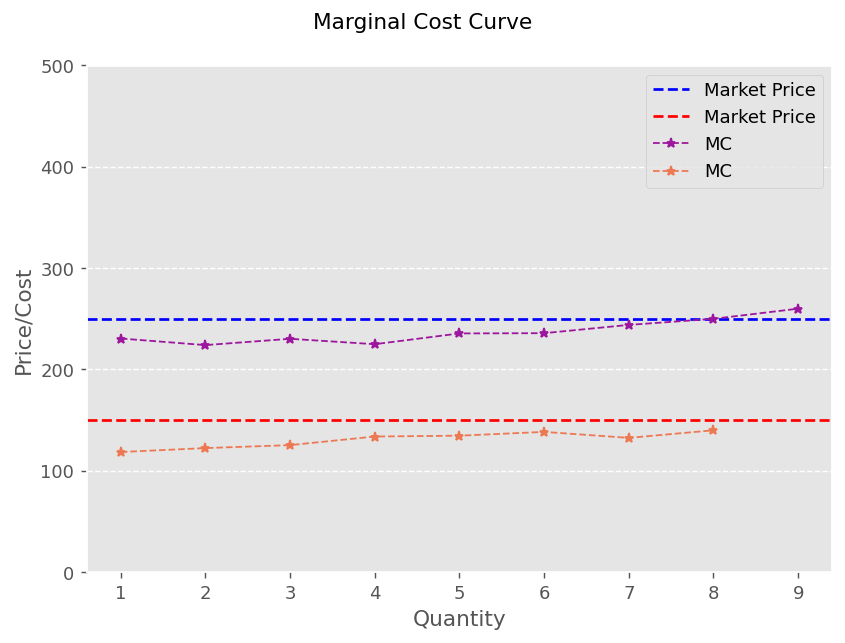

In [ ]:
# Generate the dataframe
df = df_firm
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'Reward')

df['C']      = df.apply(lambda row: eval(row['C'].replace(',', ', ')), axis=1)
df['MC']     = df.apply(lambda row: eval(row['MC'].replace(',', ', ')), axis=1)
df['Q']      = df['Q'].astype(int)

del df['TIME']
df['MC_idx'] = df['MC'].apply(lambda x: list(range(1, len(x) + 1)))

# Plot options
XX = 'CFG'
YY = 'MC'
yl = 'Price/Cost'
xl = 'Quantity'
fs = double

# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()

palette = sns.color_palette('plasma', len(df[EXP_CFG+['QLTY']].drop_duplicates()))

for i, (qlty, group) in enumerate(df.groupby('QLTY')):
    plt.axhline(y = group['UTIL'].mean(), color = qlty, linestyle = '--', label="Market Price")
    label_mc, label_atc  = "Marginal Cost", "Average Total Cost"
    

df_mc = df.explode(['MC', 'MC_idx']).reset_index(drop=True)
df_mc = df_mc.groupby(EXP_CFG+['MC_idx','QLTY'])[YY].mean()
df_mc = df_mc.reset_index().set_index('MC_idx')

# Loop through the unique EXP_CFG values and plot each one
for i, (exp_cfg_val, group) in enumerate(df_mc.groupby(EXP_CFG+['QLTY'])):
    group.plot(
        ax=ax, linestyle='--', linewidth=1, marker='*', markersize=5,
        label=f"{label_mc}: {exp_cfg_val[1]} worker", color=palette[i])

# Edit plot 
plt.suptitle('Marginal Cost Curve')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
ax.set_ylim(ymin=0, ymax = 500)
# ax.set_xlim(xmin=0, xmax = 20)
ax.legend()

plt.gcf().tight_layout()

# # plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
# plt.show()

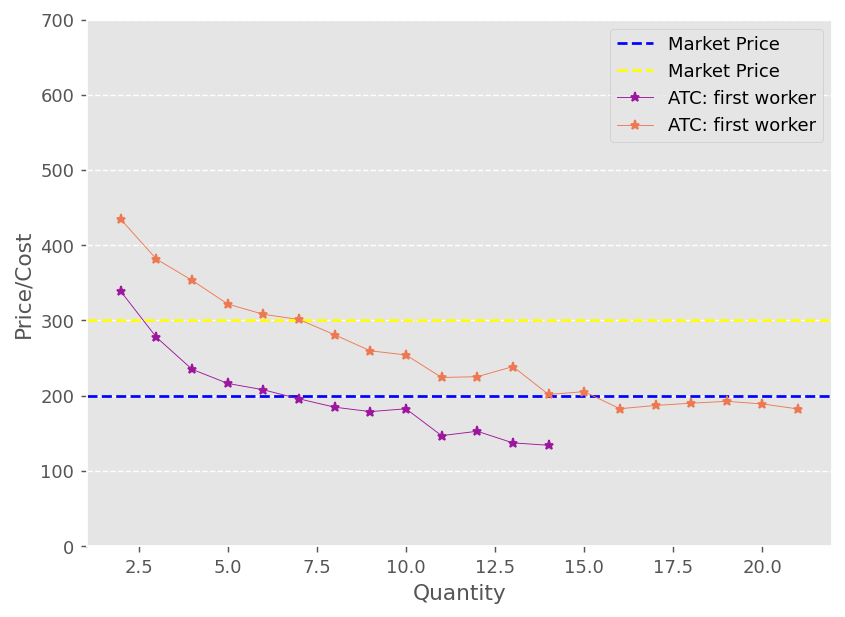

In [18]:
# Generate the dataframe
df = df_firm
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'Reward')


df['C']      = df.apply(lambda row: eval(row['C'].replace(',', ', ')), axis=1)
df['MC']     = df.apply(lambda row: eval(row['MC'].replace(',', ', ')), axis=1)
df['Q']      = df['Q'].astype(int)
df['TIME']   = df['TSTART']

# Plot options
XX = 'CFG'
YY = 'ATC'
yl = 'Price/Cost'
xl = 'Quantity'
fs = double

# df = df.query('QLTY=="yellow"')   
# df = df.query('Q>16')   
# df['MCm'] = df.apply(lambda row: max(row['MC']), axis=1)
# df = df.query('REP=="010"')
# df = df.query('CFG=="7"')
# display(df[['Q','MCm', 'ATC']])
# display(df)
# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()

palette = sns.color_palette('plasma', len(df[EXP_CFG+['QLTY']].drop_duplicates()))

for i, (qlty, group) in enumerate(df.groupby('QLTY')):
    plt.axhline(y = group['UTIL'].mean(), color = qlty, linestyle = '--', label="Market Price")
    label_mc, label_atc  = "Marginal Cost", "Average Total Cost"

# ## Actual Drops
# for i, (exp_cfg_val, group) in enumerate(df.groupby(EXP_CFG)):
#     group.set_index('Q').sort_index()['ATC'].plot(
#         ax=ax, linestyle='', linewidth=0.5, marker='*', markersize=5,
#         label="_nolegend_", color=palette[i])

## Average Total Cost Mean
df_ATC = df.groupby(EXP_CFG+['Q','QLTY'])[YY].mean()

# Loop through the unique EXP_CFG values and plot each one
for i, (exp_cfg_val, group) in enumerate(df.groupby(EXP_CFG+['QLTY'])):
    group_ATC = group.groupby('Q')[YY].mean()  # Group by Q and calculate mean ATC
    group_ATC.plot(
        ax=ax, linestyle='-', linewidth=0.5, marker='*', markersize=5,
        label=f"{YY}: {exp_cfg_val[1]} worker", color=palette[i])

# dfa, i = pd.DataFrame(), 0

# ## Marginal Cost
# for g,d in df.explode('MC').groupby('TIME'):
#     d.reset_index(inplace=True)
#     d.index +=2
#     (d['MC']).plot(ax=ax, linestyle = '', linewidth = '0.5',marker='.', markersize='2', color = 'k', label=label_mc)
#     label_mc = "_nolegend_"
#     i+=1
#     dfa[str(i)] =d['MC']
    
# ## Marginal Cost Mean
# dfa_mean = dfa.mean(axis=1)  
# dfa_mean.plot(ax=ax, linestyle = '--', linewidth = '2',marker='', markersize='2.5', color = 'k', label="MC (mean)")

    
# # for g,d in df.explode('C').groupby('TIME'):
# #     d.reset_index(inplace=True)
# #     d.index += 1
# #     (d['C']+d['FC']).plot(ax=ax, linestyle = '-', linewidth = '0.5', marker='*', markersize='2.5', color = 'g')
    

# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
ax.set_ylim(ymin=0, ymax = 700)
# ax.set_xlim(xmin=0, xmax = 20)
ax.legend()

plt.gcf().tight_layout()
# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

## SC (Balances)

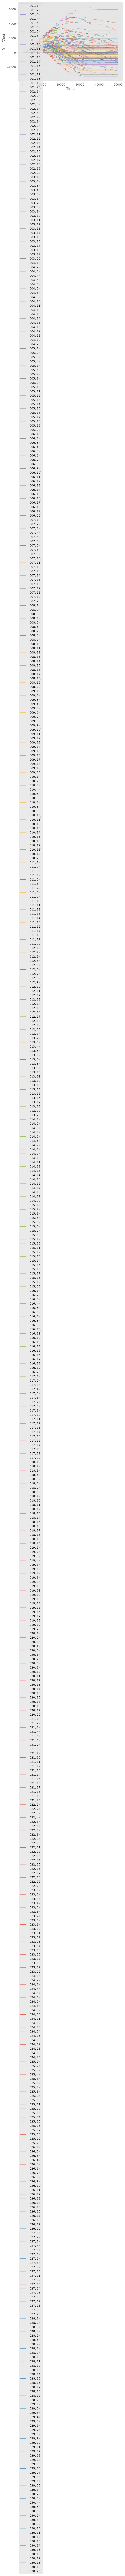

In [35]:
# Generate the dataframe
df = df_sc
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'Reward')

# Plot options
XX = 'TIMESTAMP'
YY = 'BALANCE'
yl = 'Price/Cost'
xl = 'Time'
fs = double

# Corrections to dataframe
# df['BALANCE'] = df['QTTY']
df = df.set_index(XX)
# df['Reward'] = df.apply(lambda row: eval(row['Reward'])['blue'], axis=1)
# display(df)


# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()

## Balance
df.groupby(['REP','ID'])[YY].plot(
    ax=ax, linestyle = '-', linewidth = '0.5', markersize='5')

# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
# ax.set_ylim(ymin=0, ymax = 30)
# ax.set_xlim(xmin=0, xmax = 20)
ax.legend()

plt.gcf().tight_layout()

# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

## Epoch (Unit Cost over Time)

Text(0.5, 1.0, '')

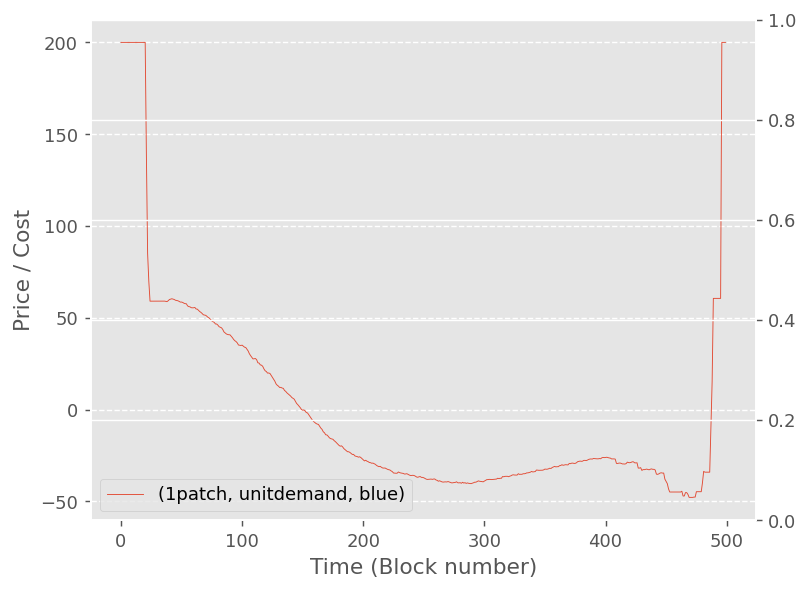

In [40]:
# Generate the dataframe
df = df_sc
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'utility')

# Plot options
XX = 'start'
YY = 'profit'
yl = 'Price / Cost'
xl = 'Time (Block number)'
fs = double
labels = ["Market Price", "Marginal Cost", "Average Total Cost", "Number of Workers"]

# Corrections to dataframe
df = df.drop_duplicates(['HASH','QLTY'])
df['UTIL']   = df.apply(lambda row: eval(row['utility'])[row['QLTY']], axis=1)
df['price']  = df['price']*df['UTIL']
df['profit'] = df['price']-df['AATC']

# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()
palette = sns.color_palette('plasma', len(df[EXP_CFG+['QLTY']].drop_duplicates()))

# Market price 
# for i, (qlty, group) in enumerate(df.groupby('QLTY')):
#     plt.axhline(y = group['UTIL'].mean(), color = qlty, linestyle = '--', label="Market Price")
#     label_mc, label_atc  = "Marginal Cost", "Average Total Cost"

# display(df['profit'])

## ATC 
# df = df.query("REP=='002'")
# df.query("REP=='002'").set_index('BLOCK').groupby(EXP_CFG_REP)[YY].plot(
#     ax=ax, linestyle = '-', linewidth = '0.5', color = 'r', label=labels[1])

avg_AATC = df.groupby(['EXP','CFG','BLOCK','QLTY'])[YY].mean().reset_index()
avg_AATC.set_index('BLOCK').groupby(EXP_CFG+['QLTY'])[YY].plot(
    ax=ax, linestyle='-', linewidth=0.5)


## Workers
# ax2 = ax.twinx() 
# # df.query("REP=='002'").set_index('BLOCK').groupby(EXP_CFG_REP)['TOTW'].plot(
# #     ax=ax2, drawstyle="steps-post", linestyle = '-', marker='.', linewidth = '0.5', color = 'k', label=labels[3])

# avg_TOTW = df.groupby(['EXP','CFG','BLOCK'])['TOTW'].mean().reset_index()
# avg_TOTW.set_index('BLOCK')['TOTW'].plot(
#     ax=ax2, linestyle='-', linewidth=0.5, color='k', label='Average')

## Workers
ax2 = ax.twinx() 
# df.query("REP=='002'").set_index('BLOCK').groupby(EXP_CFG_REP)['TOTW'].plot(
#     ax=ax2, drawstyle="steps-post", linestyle = '-', marker='.', linewidth = '0.5', color = 'k', label=labels[3])

# avg_TQ = df.groupby(['EXP','CFG','BLOCK'])['TOTW'].mean().reset_index()
# avg_TQ.set_index('BLOCK')['TOTW'].plot(
#     ax=ax2, linestyle='-', linewidth=0.5, color='k', label='Average')

# # display(df)
# Edit plot 
ax.legend()
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
# ax.set_ylim(ymin=0, ymax = 30)


## Epoch (Total Profit)

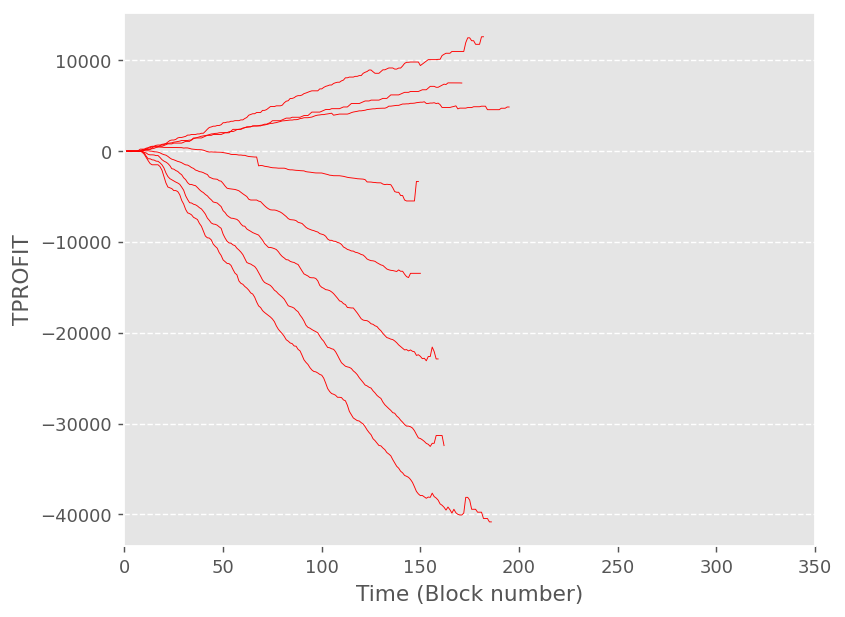

In [81]:
df = df_sc
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'utility')

# Corrections to dataframe
df = df.drop_duplicates(['HASH'])
# df = df.query('REP=="001"')
# df['utility'] = df.apply(lambda row: eval(row['utility'])['blue'], axis=1)
df['drops'] = df.apply(lambda row: len(eval(row['Q'].replace(',', ', '))), axis=1)
# df['TC'] = df.apply(lambda row: eval(row['TC'].replace(',', ', ')), axis=1)
# df['ATC'] = df.apply(lambda row: eval(row['ATC'].replace(',', ', ')), axis=1)
# df['AATC'] = df.apply(lambda row: sum([a*b for a,b in zip(row['Q'],row['ATC'])])/sum(row['Q']), axis=1)
# df['WORKERS'] = df.apply(lambda row: len(row['Q']), axis=1)
# df['MPRICE'] = df.apply(lambda row: row['price']*row['utility'], axis=1)
# df['DURATION'] = df['start'].diff()

# df['TQ'] = df.apply(lambda row: sum(row['Q']), axis=1)
# df['TQPERROBO'] = df.apply(lambda row: sum(row['Q']), axis=1)
# df['TQTIME'] = df.apply(lambda row: row['TQ']/row['DURATION']/2, axis=1)
# df['TREVENUE'] = df.apply(lambda row: sum([q*row['price']*row['utility'] for q in row['Q']]), axis=1)
# df['TCOST'] = df.apply(lambda row: sum(row['TC']), axis=1)
df['TPROFIT'] = df.apply(lambda row: (row['TQ']*row['AP']), axis=1)
df['TPROFITPERROBOT'] = df.apply(lambda row: row['TPROFIT']/row['TOTW'], axis=1)

# df['TPROFITSCALED'] = df.apply(lambda row: (row['TREVENUE']-row['TCOST'])/100, axis=1)
# df['TPROFITTIME'] = df.apply(lambda row: row['TPROFIT']/row['DURATION'], axis=1)

df['new_drop'] = (df['drops'] != df['drops'].shift(1)).astype(int)
df['new_drop'] = df['new_drop'] * df['TPROFIT']
df['TPROFITCUMSUM'] =  df.groupby('REP')['new_drop'].transform(pd.Series.cumsum)

# print(df.query('NEW!=0')['NEW'])
# display(df[['drops','TPROFIT','new_drop']])

# Plot options
XX = 'BLOCK'
YY = 'TPROFIT'
yl = YY
xl = 'Time (Block number)'
fs = double
labels = ["Market Price", "Marginal Cost", "Average Total Cost", "Number of Workers"]

# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()

# df.set_index(XX).groupby(EXP_CFG_REP)[YY].plot(
#     ax=ax, linestyle = '-', marker='.', linewidth = '0.5', color = 'r', label=labels[1])

avg_YY = df.groupby(['EXP','CFG','BLOCK'])[YY].mean().reset_index()
avg_YY.set_index('BLOCK').groupby(EXP_CFG)[YY].plot(
    ax=ax, linestyle='-', linewidth=0.5, color='r', label='Average')


# ## Workers
# ax2 = ax.twinx() 
# df.set_index(XX).groupby(['CFG','REP'])['WORKERS'].plot(ax=ax2, linestyle = '-', marker='.', linewidth = '0.5', color = 'k', label=labels[3])

# display(df)
# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)

ax.set_title('') 
# ax.set_ylim(ymin=0, ymax = 30)
ax.set_xlim(xmin=0, xmax = 350)
# ax.legend()
plt.gcf().tight_layout()

# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)

plt.show()

## Epoch (Profit Boxplot)

In [ ]:
# Generate the dataframe
df = load_df('epoch')
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'utility')

# Corrections to dataframe
df = df.drop_duplicates(subset=['NUMBER','BSTART', 'Q', 'TC'])
df['CFG'] = df['CFG'].astype('int')

if 'BSTART' in df and not df['BSTART'].isnull().values.any():
    df['start'] = df['BSTART']
df['utility'] = df.apply(lambda row: eval(row['utility'])['blue'], axis=1)
df['Q'] = df.apply(lambda row: eval(row['Q'].replace(',', ', ')), axis=1)
df['TC'] = df.apply(lambda row: eval(row['TC'].replace(',', ', ')), axis=1)
df['ATC'] = df.apply(lambda row: eval(row['ATC'].replace(',', ', ')), axis=1)
df['AATC'] = df.apply(lambda row: sum([a*b for a,b in zip(row['Q'],row['ATC'])])/sum(row['Q']), axis=1)
df['WORKERS'] = df.apply(lambda row: len(row['Q']), axis=1)
df['MPRICE'] = df.apply(lambda row: row['price']*row['utility'], axis=1)
df['DURATION'] = df['start'].diff()

df['TQ'] = df.apply(lambda row: sum(row['Q']), axis=1)
df['TQTIME'] = df.apply(lambda row: row['TQ']/row['DURATION']/2, axis=1)
df['TREVENUE'] = df.apply(lambda row: sum([q*row['price']*row['utility'] for q in row['Q']]), axis=1)
df['TCOST'] = df.apply(lambda row: sum(row['TC']), axis=1)
df['TPROFIT'] = df.apply(lambda row: (row['TREVENUE']-row['TCOST']), axis=1)
df['TPROFITPERROBOT'] = df.apply(lambda row: (row['TREVENUE']-row['TCOST'])/row['WORKERS'], axis=1)
df['TPROFITCUMSUM'] =  df.groupby(['CFG','REP'])['TPROFIT'].transform(pd.Series.cumsum)
df['TPROFITSCALED'] = df.apply(lambda row: (row['TREVENUE']-row['TCOST'])/100, axis=1)
df['TPROFITTIME'] = df.apply(lambda row: row['TPROFIT']/row['DURATION'], axis=1)

# Plot options
# display(df[['ATC', 'AATC']])
XX = 'start'
YY = 'TQ'
BP = 'REP'
yl = YY
xl = 'Time (Block number)'
fs = double
labels = ["Market Price", "Marginal Cost", "Average Total Cost", "Number of Workers"]

# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()


df = df.groupby(['CFG', 'REP'], as_index=False).agg({YY:'sum', 'TCOST':'sum'})
df['ATCOST'] = df['TCOST']/df[YY]
display(df)

# Create plot
bp = df.groupby(BP).boxplot(column=[YY], by = XX, sharex=True, figsize=fs, layout=(1,1))


# df.set_index(XX).groupby('REP')[YY].plot(ax=ax, linestyle = '-', marker='.', linewidth = '0.5', color = 'r', label=labels[1])

# ## Workers
# ax2 = ax.twinx() 
# df.set_index(XX).groupby('REP')['WORKERS'].plot(ax=ax2, linestyle = '-', marker='.', linewidth = '0.5', color = 'k', label=labels[3])

# display(df)
# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
# ax.xaxis.set_ticks(d.index-1)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)

ax.set_title('') 
# ax.set_ylim(ymin=0, ymax = 30)
# ax.set_xlim(xmin=0, xmax = 20)
# ax.legend()
plt.gcf().tight_layout()

# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

## Patches (Quantity)

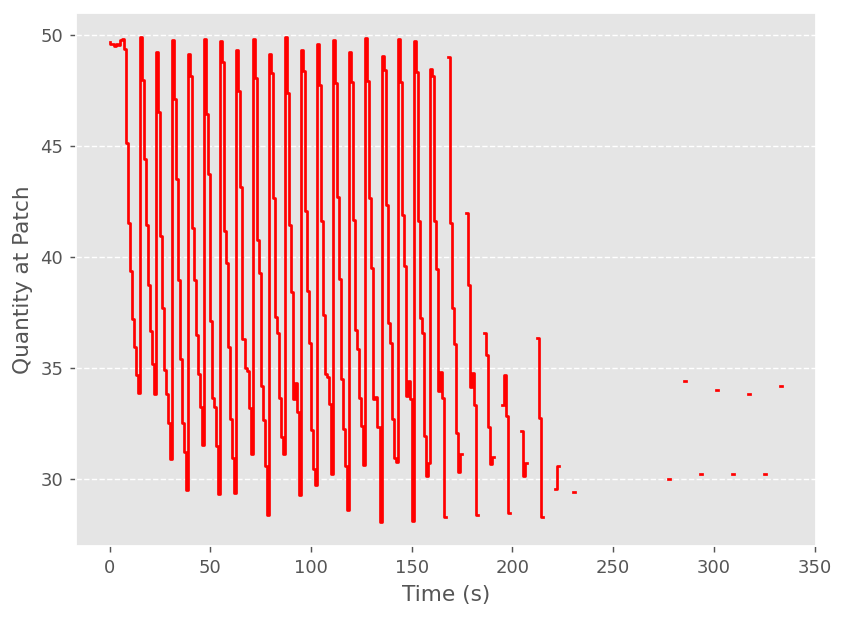

In [82]:
# Generate the dataframe
# df = load_df('patches')
df = df_patches
df = get_param_df(df, 'generic', 'num_robots', alias = 'Robots')
df = get_param_df(df, 'patches', 'utility', alias = 'utility')

# Plot options
XX = 'TIME'
YY = 'QTTY'
yl = 'Quantity at Patch'
xl = 'Time (s)'
fs = double
labels = ["Market Price", "Marginal Cost", "Average Total Cost", "Number of Workers"]

# df['QTTY'] = df.apply(lambda row: {x.split(':')[0]: x.split(':')[1] for x in row['JSON'].split(',')}['quantity'], axis=1)
df['QTTY'] = df.apply(lambda row: eval(row['JSON'])['quantity'], axis=1)

df = df.set_index(XX)  

# Create plot
fig, ax = plt.figure(figsize=fs), plt.axes()

# Quantity at patch
time_window = 10
df['TIME_BIN'] = pd.cut(df.index, bins=pd.interval_range(start=df.index.min(), 
                                                          end=df.index.max(), 
                                                          freq=time_window))

avg_YY = df.groupby(['TIME_BIN', 'EXP', 'CFG'])[YY].mean().reset_index()

avg_YY[YY].plot(
    ax=ax, drawstyle="steps", linestyle = '-', color = 'r', label=labels[1])

# Edit plot 
plt.suptitle('')
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle = '--')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('') 
# ax.legend()
plt.gcf().tight_layout()

# plt.savefig("plots/experiment_"+EXP+"/value_bp_%s_%s.png" % (XX,YY), bbox_inches='tight', dpi=600)
plt.show()

## Ticks per second (histogram)

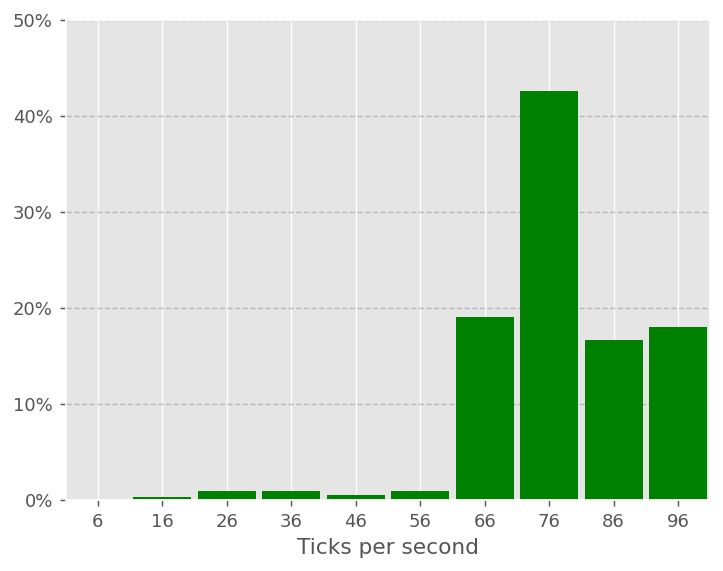

In [41]:
# display(EXP_drop)
# EXP = EXP_drop.value

# Generate the dataframe
df = df_sim

# Process the dataframe 
step = 10
bins = np.arange(df['TPS'].min(), df['TPS'].max(), step)-step/2
xticks = np.arange(df['TPS'].min(), df['TPS'].max()+step, step)

# Create plot
ax = plt.axes()
hist, bins = np.histogram(df['TPS'], bins=bins)
ax.bar(bins[:-1]+(bins[1]-bins[0])/2, hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0])*0.9, color='green')

# Edit plot
ax.grid(axis='y', linestyle='--', color='k', alpha=0.2, zorder=0) 

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.set_ylim(ymin=0, ymax = 0.5)
ax.set_xticks(xticks)
ax.set_xlim(xmin=bins[0], xmax = bins[-1])
ax.set_xlabel('Ticks per second')

# Save plot
# plt.savefig("plots/experiment_"+EXP+"/ticks_per_second.png", bbox_inches='tight')
plt.show()

## Blockchain Visualizer (graph)

In [84]:
# Select which experiment to plot the whole blockchain
df = df_block
df = df.query("REP=='001'")

df = df.drop_duplicates('HASH').sort_values('BLOCK').reset_index()
display(df)

# Process data
genesis = df['PHASH'].iloc[0]
main_leaf = df[df['TDIFF'] == df['TDIFF'].max()]['HASH'].iloc[0]

# Iterate from main_leaf to genesis -> mainchain
df_mainchain = get_mainchain_df(df, main_leaf)

# Block hashes not in the mainchain -> forks
df_forks = df.query("HASH not in @df_mainchain['HASH']")

# Block hashes which are in forks, but are not parents -> leafs
df_leafs = df_forks.query('HASH not in PHASH')

# Block hashes which are in forks, are parents but not children -> roots
df_roots = df_forks.query('PHASH not in HASH')


index  ID          TIME  TELAPSED  TIMESTAMP  BLOCK   
0          0   1  1.727856e+09     19999          0      0  \
1      63929   1  1.727860e+09     19899        100      1   
2      95533   1  1.727862e+09     19899        100      1   
3     122792   1  1.727864e+09     19899        100      1   
4     181402   1  1.727869e+09     19899        100      1   
...      ...  ..           ...       ...        ...    ...   
1187  153230  20  1.727867e+09         5      19994    159   
1188     160   1  1.727856e+09       382      19617    160   
1189     161   1  1.727856e+09       282      19717    161   
1190     162   1  1.727856e+09       182      19817    162   
1191     163   1  1.727856e+09        82      19917    163   

                                                   HASH   
0     849f88fe514e3c617eea1c11b175316038208403cc67ad...  \
1     2aa2b5de6fc773b47bcfc6633d510c60ff81047eea3e8d...   
2     140a24ae733f559f0659bd9c39517763fc1a842f8a9bfd...   
3     06286fed333a84f05fca5cfbfdc3c49c1900c98e3cd3a6...   
4     472110c477b913b2b1ef0b74caef2310e6c905b067be26...   
...                                                 ...   
1187  e2135de6830b3cfc12e835160081420303dac2536518e7...   
1188  d2a53fc2e9665af4d0eb17075cee5adbc5f7d2b2caa93a...   
1189  85e568d93c58de7984cc063371e21abced2b3190192e83...   
1190  bc5dc22463db88c3ac8aab7ff678951b1acb8a5a6364ac...   
1191  42eca4ea72e4f40a390a01d41553cf622e5257e5c6ebb4...   

                                                  PHASH  DIFF  TDIFF   
0                                                     0     0      0  \
1     849f88fe514e3c617eea1c11b175316038208403cc67ad...     2      2   
2     849f88fe514e3c617eea1c11b175316038208403cc67ad...     2      2   
3     849f88fe514e3c617eea1c11b175316038208403cc67ad...     2      2   
4     849f88fe514e3c617eea1c11b175316038208403cc67ad...     2      2   
...                                                 ...   ...    ...   
1187  b4ff634f6fa3e36d661dfb802d6d78e5ea39e53b842399...     2    318   
1188  e8d18acc8a7f885aee02d832ec107dbfc9af3f8e39bd68...     2    320   
1189  d2a53fc2e9665af4d0eb17075cee5adbc5f7d2b2caa93a...     2    322   
1190  85e568d93c58de7984cc063371e21abced2b3190192e83...     2    324   
1191  bc5dc22463db88c3ac8aab7ff678951b1acb8a5a6364ac...     2    326   

          SIZE  TXS  UNC  PENDING  QUEUED          EXP CFG  REP CONTROLLER  
0     0.046875    0    0      NaN     NaN  varyworkers   1  001          1  
1     0.046875   23    0      NaN     NaN  varyworkers   3  001          3  
2     0.046875   24    0      NaN     NaN  varyworkers   4  001          4  
3     0.046875   25    0      NaN     NaN  varyworkers   5  001          5  
4     0.046875   27    0      NaN     NaN  varyworkers   7  001          7  
...        ...  ...  ...      ...     ...          ...  ..  ...        ...  
1187  0.046875    0    0      NaN     NaN  varyworkers   6  001          6  
1188  0.046875    0    0      NaN     NaN  varyworkers   1  001          1  
1189  0.046875    0    0      NaN     NaN  varyworkers   1  001          1  
1190  0.046875    0    0      NaN     NaN  varyworkers   1  001          1  
1191  0.046875    0    0      NaN     NaN  varyworkers   1  001          1  

[1192 rows x 19 columns]

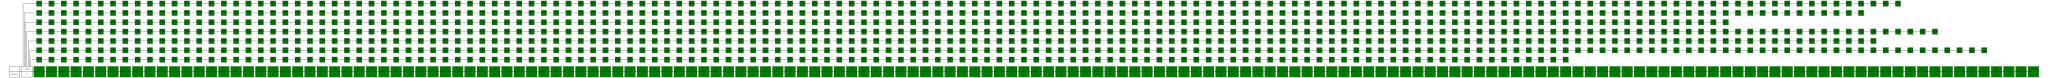

In [85]:
TRIM_FORKS = 0

# fork_paths = [[y] for y in df_leafs['HASH']]
# df_roots.apply(lambda row : fork_paths.extend(nx.all_simple_paths(forks_nx, row['HASH'], list(df_leafs['HASH']))), axis = 1)
# fork_paths_longer_than = paths_longer_than(fork_paths, MIN_FORK_LENGTH)
# nodes_in_forks_longer_than = nodes_in_paths(fork_paths_longer_than)
# df_trimmed = df.query('HASH in @nodes_in_forks_longer_than or HASH in @df_mainchain['HASH']')

df_trimmed = trim_chain(df, TRIM_FORKS)
# display(df_trimmed)

bc = create_digraph(df)
bc_trimmed = create_digraph(df_trimmed)

# Do something cool? Idk, for example mainchain in blue or make it bigger
df_trimmed.query("HASH in @df_mainchain['HASH']").apply(lambda row : bc_trimmed.node(row['HASH'], height='0.7', width='0.7'), axis = 1)
bc_trimmed.node(genesis, height='0.7', width='0.7')

# Do something cool? Idk, for example color blocks sealed by prefered sealer in green. 
df_trimmed.query('DIFF==2').apply(lambda row : bc_trimmed.node(row['HASH'], style='filled', fillcolor='green'), axis = 1)

# Do something cool? Idk, for example try to make mainchain at same level
df_trimmed.query("HASH in @df_mainchain['HASH']").apply(lambda row : bc_trimmed.node(row['HASH'], group='main'), axis = 1)
bc_trimmed.node(genesis, group='main')


# # Do something cool? Idk, make all black for mini-plot
# df_trimmed.apply(lambda row : bc_trimmed.node(row['HASH'], style='filled', fillcolor='black'), axis = 1)
# bc_trimmed.node(genesis, style='filled', fillcolor='black')

# # Do something cool? Idk, for example try to keep all forks at same level (slow!)
# df_trimmed.query('HASH in @nodes_in_forks_longer_than').apply(lambda row : bc_trimmed.node(row['HASH'], group='forks'), axis = 1)

# Save plot
bc_trimmed.render('plots/blockchain', format='png', view=True)
bc_trimmed